In [16]:
import numpy as np
from tslearn.utils import to_time_series_dataset
my_first_time_series = [1, 3, 4, 2]
my_second_time_series = [1, 2, 4, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series, my_second_time_series])
print(formatted_dataset.shape)

my_third_time_series = [1, 2, 4, 2, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series,
                                                my_second_time_series,
                                                my_third_time_series])
print(formatted_dataset.shape)

print(formatted_dataset)

(2, 4, 1)
(3, 5, 1)
[[[ 1.]
  [ 3.]
  [ 4.]
  [ 2.]
  [nan]]

 [[ 1.]
  [ 2.]
  [ 4.]
  [ 2.]
  [nan]]

 [[ 1.]
  [ 2.]
  [ 4.]
  [ 2.]
  [ 2.]]]


In [23]:
some_array = np.array([[1], [2], [3]])
print(some_array.shape)
print(some_array[1][0])

(3, 1)
2


In [26]:
y = range(5)
print(list(y))

[0, 1, 2, 3, 4]


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


0.008 --> 0.006 --> 0.005 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 


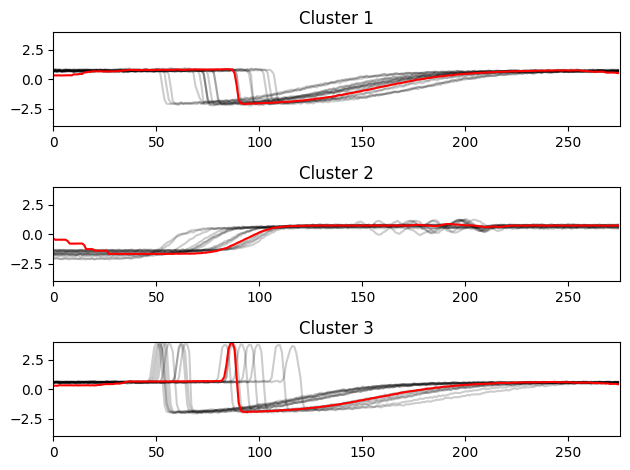

In [27]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

numpy.random.seed(0)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# Keep first 3 classes and 50 first time series
X_train = X_train[y_train < 4]
X_train = X_train[:50]
numpy.random.shuffle(X_train)
# For this method to operate properly, prior scaling is required
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]

# kShape clustering
init=numpy.array([X_train[44], X_train[47], X_train[0]])
ks = KShape(n_clusters=3, verbose=True, init=init)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [ ]:
X_train[42].shape